## Final Project 
### Blindness Detection
#### Group: Gareth Sun zs389, Zimu Li zl898, Arman Syed as3778


### 1. Data Preprocess

In [1]:
# Import the Library we need
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt



In [2]:
# Load training Data
train_df = pd.read_csv('train.csv')
train_df['diagnosis'] = train_df['diagnosis'].astype(str)
train_df['pic_id'] = train_df['id_code'].astype(str)+'.png'
train_df.head()

,id_code,diagnosis,pic_id
0,000c1434d8d7,2,000c1434d8d7.png
1,001639a390f0,4,001639a390f0.png
2,0024cdab0c1e,1,0024cdab0c1e.png
3,002c21358ce6,0,002c21358ce6.png
4,005b95c28852,0,005b95c28852.png


In [3]:
# Data Load
preprocessor = ImageDataGenerator(
    # Normalization
    rescale= 1/255,
    # # Use Data Augmentation to prevent overfitting
    # shear_range= 0.2,
    # zoom_range= 0.2,
    # horizontal_flip= True, 
    # Split validation and training dataset
    validation_split= 0.2
    )

# Set the batch and image size
image_size = 64
batch_size = 32

train_pic = preprocessor.flow_from_dataframe(
    # Load Training Dataset
    dataframe= train_df,
    directory= 'train_images',
    x_col= 'pic_id',
    y_col= 'diagnosis',
    batch_size= batch_size,
    class_mode= 'categorical',
    shuffle= True,
    subset= 'training',
    target_size= (image_size, image_size)
    )

test_pic = preprocessor.flow_from_dataframe(
    # Load Testing Dataset
    dataframe= train_df,
    directory= 'train_images',
    x_col= 'pic_id',
    y_col= 'diagnosis',
    batch_size= batch_size,
    class_mode= 'categorical',
    shuffle= True,
    subset= 'validation',
    target_size= (image_size, image_size)
)

# Covert category into one-hot code
train_label = pd.get_dummies(train_df['diagnosis'])
num_classes = train_label.shape[1]
num_samples = train_label.shape[0]

print(num_classes)
print(num_samples)

Found 2930 validated image filenames belonging to 5 classes.
Found 732 validated image filenames belonging to 5 classes.
5
3662


### 2. Build CNN Model

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [5]:
def cnn_model(image_size, num_classes):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model




In [6]:
model = cnn_model(image_size, num_classes)
# Save the model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback

tm = ModelCheckpoint('version1', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

class AccuracyPlotter(Callback):
    def on_train_begin(self, logs={}):
        self.train_acc = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs={}):
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

    def on_train_end(self, logs={}):
        plt.figure(figsize=(20,10))
        plt.plot(range(1, len(self.train_acc) + 1), self.train_acc, label='Training Accuracy')
        plt.plot(range(1, len(self.val_acc) + 1), self.val_acc, label='Validation Accuracy')
        plt.title('Accuracy Plot')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.xticks(range(1, len(self.train_acc) + 1))
        plt.legend()
        plt.grid(True)
        plt.show()
        
plotter = AccuracyPlotter()

Epoch 1/50
91/91 [==============================] - ETA: 0s - loss: 1.1216 - accuracy: 0.5704
Epoch 1: val_loss improved from inf to 0.94902, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 185s 2s/step - loss: 1.1216 - accuracy: 0.5704 - val_loss: 0.9490 - val_accuracy: 0.7131
Epoch 2/50
91/91 [==============================] - ETA: 0s - loss: 0.8361 - accuracy: 0.7036
Epoch 2: val_loss improved from 0.94902 to 0.85360, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 182s 2s/step - loss: 0.8361 - accuracy: 0.7036 - val_loss: 0.8536 - val_accuracy: 0.6690
Epoch 3/50
91/91 [==============================] - ETA: 0s - loss: 0.7992 - accuracy: 0.7150
Epoch 3: val_loss improved from 0.85360 to 0.79744, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 181s 2s/step - loss: 0.7992 - accuracy: 0.7150 - val_loss: 0.7974 - val_accuracy: 0.7003
Epoch 4/50
91/91 [==============================] - ETA: 0s - loss: 0.7679 - accuracy: 0.7274
Epoch 4: val_loss did not improve from 0.79744
91/91 [==============================] - 1266s 14s/step - loss: 0.7679 - accuracy: 0.7274 - val_loss: 0.8415 - val_accuracy: 0.7102
Epoch 5/50
91/91 [==============================] - ETA: 0s - loss: 0.7644 - accuracy: 0.7253 
Epoch 5: val_loss improved from 0.79744 to 0.79422, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 2197s 24s/step - loss: 0.7644 - accuracy: 0.7253 - val_loss: 0.7942 - val_accuracy: 0.7173
Epoch 6/50
91/91 [==============================] - ETA: 0s - loss: 0.7479 - accuracy: 0.7281 
Epoch 6: val_loss improved from 0.79422 to 0.76686, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 3792s 42s/step - loss: 0.7479 - accuracy: 0.7281 - val_loss: 0.7669 - val_accuracy: 0.7145
Epoch 7/50
91/91 [==============================] - ETA: 0s - loss: 0.7477 - accuracy: 0.7277
Epoch 7: val_loss did not improve from 0.76686
91/91 [==============================] - 205s 2s/step - loss: 0.7477 - accuracy: 0.7277 - val_loss: 0.7991 - val_accuracy: 0.7102
Epoch 8/50
91/91 [==============================] - ETA: 0s - loss: 0.7436 - accuracy: 0.7315
Epoch 8: val_loss improved from 0.76686 to 0.75930, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 217s 2s/step - loss: 0.7436 - accuracy: 0.7315 - val_loss: 0.7593 - val_accuracy: 0.7060
Epoch 9/50
91/91 [==============================] - ETA: 0s - loss: 0.7446 - accuracy: 0.7226
Epoch 9: val_loss did not improve from 0.75930
91/91 [==============================] - 219s 2s/step - loss: 0.7446 - accuracy: 0.7226 - val_loss: 0.7945 - val_accuracy: 0.7060
Epoch 10/50
91/91 [==============================] - ETA: 0s - loss: 0.7326 - accuracy: 0.7315
Epoch 10: val_loss did not improve from 0.75930
91/91 [==============================] - 220s 2s/step - loss: 0.7326 - accuracy: 0.7315 - val_loss: 0.7659 - val_accuracy: 0.7131
Epoch 11/50
91/91 [==============================] - ETA: 0s - loss: 0.7241 - accuracy: 0.7333
Epoch 11: val_loss did not improve from 0.75930
91/91 [==============================] - 222s 2s/step - loss: 0.7241 - accuracy: 0.7333 - val_loss: 0.7647 - val_accuracy: 0.7230
Epoch 12/50
91/91 [==============================] - 

INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 223s 2s/step - loss: 0.7293 - accuracy: 0.7315 - val_loss: 0.7506 - val_accuracy: 0.7159
Epoch 13/50
91/91 [==============================] - ETA: 0s - loss: 0.7140 - accuracy: 0.7364
Epoch 13: val_loss did not improve from 0.75063
91/91 [==============================] - 223s 2s/step - loss: 0.7140 - accuracy: 0.7364 - val_loss: 0.7735 - val_accuracy: 0.7116
Epoch 14/50
91/91 [==============================] - ETA: 0s - loss: 0.7156 - accuracy: 0.7360
Epoch 14: val_loss did not improve from 0.75063
91/91 [==============================] - 224s 2s/step - loss: 0.7156 - accuracy: 0.7360 - val_loss: 0.7716 - val_accuracy: 0.7088
Epoch 15/50
91/91 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.7381
Epoch 15: val_loss did not improve from 0.75063
91/91 [==============================] - 224s 2s/step - loss: 0.6960 - accuracy: 0.7381 - val_loss: 0.7551 - val_accuracy: 0.7116
Epoch 16/50
91/91 [==============================] 

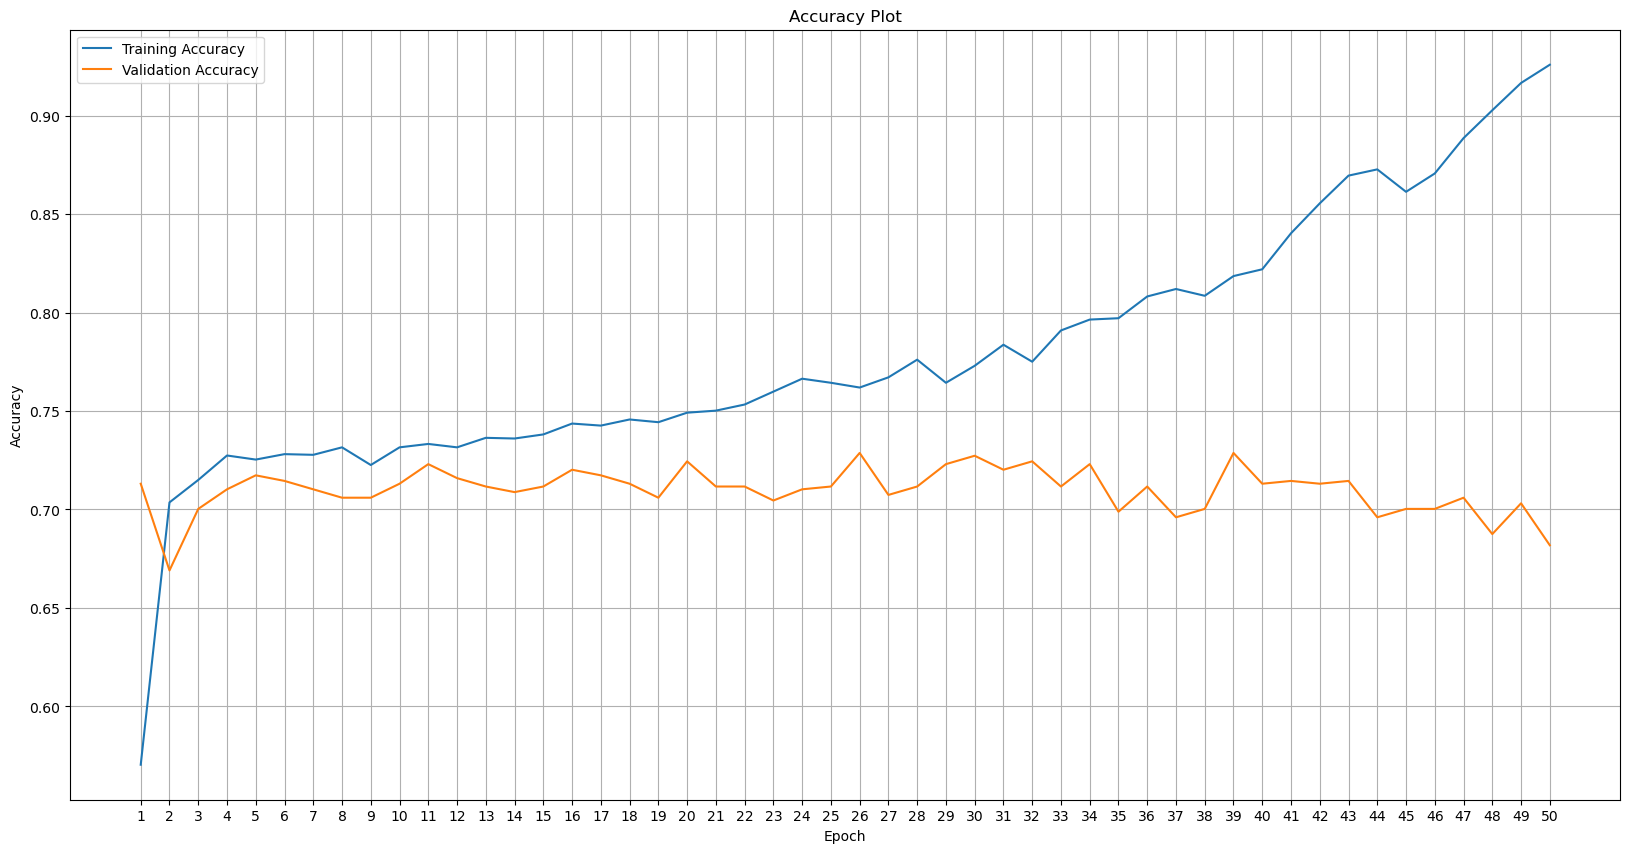

In [7]:
steps_per_epoch = 2930 // batch_size
validation_steps = 732 // batch_size
model.fit(
    train_pic,
    steps_per_epoch=steps_per_epoch, 
    epochs=50, 
    validation_data=test_pic,
    validation_steps=validation_steps,
    callbacks=[tm, plotter]
)

### 3. Give out Prediction Results

In [8]:
from keras.models import load_model
trained_model = load_model('version1')

prediction_df = pd.read_csv('sample_submission.csv')
prediction_df['pic_id'] = prediction_df['id_code'].astype(str)+'.png'

In [9]:
prediction_pic = ImageDataGenerator(
    rescale= 1/255
)
pre_prediction = prediction_pic.flow_from_dataframe(
    # Load Prediction Dataset
    dataframe= prediction_df,
    directory= 'test_images',
    x_col= 'pic_id',
    batch_size= batch_size,
    class_mode= None,
    shuffle= False,
    target_size= (image_size, image_size)
)

Found 1928 validated image filenames.


In [10]:
results = model.predict(pre_prediction, steps = len(pre_prediction))
max_probability = np.argmax(results,axis=1) 
prediction_df['diagnosis'] = max_probability
prediction_df.drop(columns=['pic_id'], inplace= True)
prediction_df.to_csv('submission.csv', index=False)

61/61 [==============================] - 39s 644ms/step
